In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:


# Функция для анализа и визуализации временного ряда с разными параметрами модели
def analyze_and_visualize_with_different_parameters(file_path, seasonal_periods, seasonality_types):
    # Загрузка данных
    data = pd.read_csv(file_path, index_col=0, parse_dates=True)

    # Разделение данных на обучающую и тестовую выборки
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]

    for seasonality_type in seasonality_types:
        # Обучение модели Хольта-Винтерса
        model = ExponentialSmoothing(train, seasonal=seasonality_type, seasonal_periods=seasonal_periods).fit()

        # Прогнозирование для тестовых данных
        predictions = model.forecast(steps=len(test))

        # Оценка качества прогноза
        mse = mean_squared_error(test, predictions)
        mae = mean_absolute_error(test, predictions)

        # Визуализация результатов
        plt.figure(figsize=(10, 6))
        plt.plot(train, label='Train')
        plt.plot(test, label='Test')
        plt.plot(test.index, predictions, label=f'Forecast ({seasonality_type})')
        plt.title(f'Time Series Forecast vs Actuals - {seasonality_type} Seasonality')
        plt.legend()
        plt.show()

        # Вывод метрик
        print(f'Seasonality Type: {seasonality_type}')
        print(f'MSE: {mse}')
        print(f'MAE: {mae}')


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


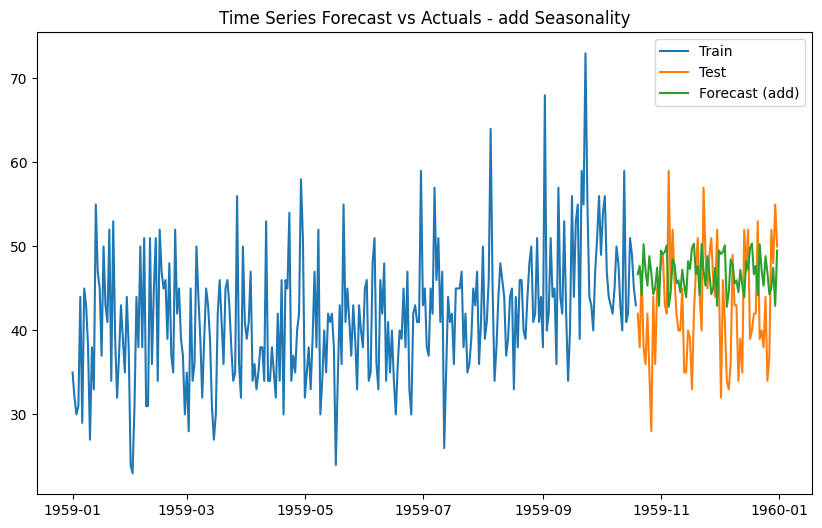

Seasonality Type: add
MSE: 65.27880692391518
MAE: 6.693419173074678


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


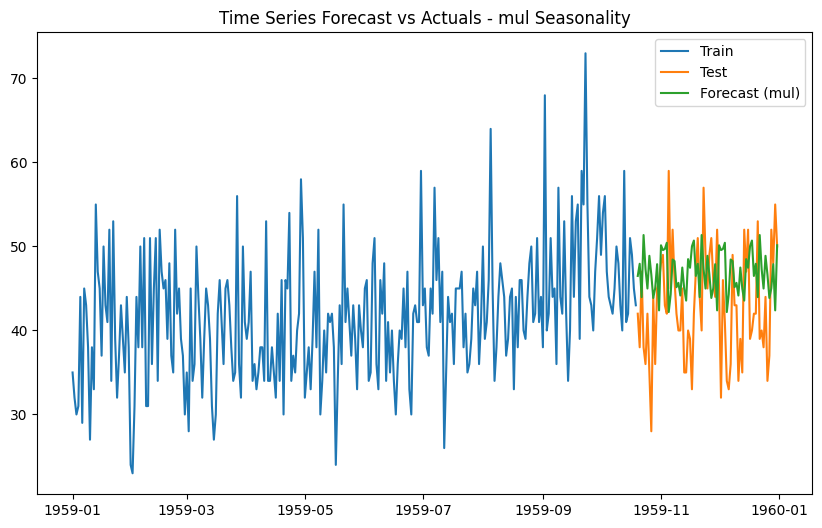

Seasonality Type: mul
MSE: 67.43417705343332
MAE: 6.798756511299629


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


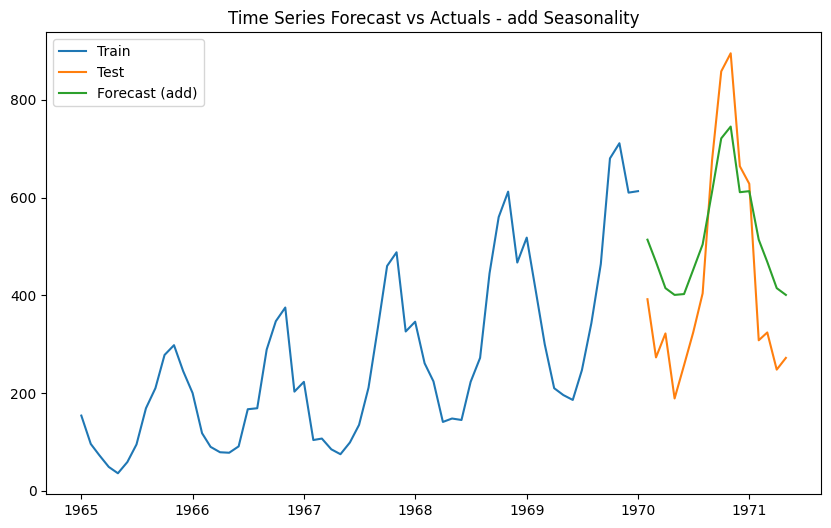

Seasonality Type: add
MSE: 19380.205514044603
MAE: 128.80006061403904


/Users/admin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/admin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


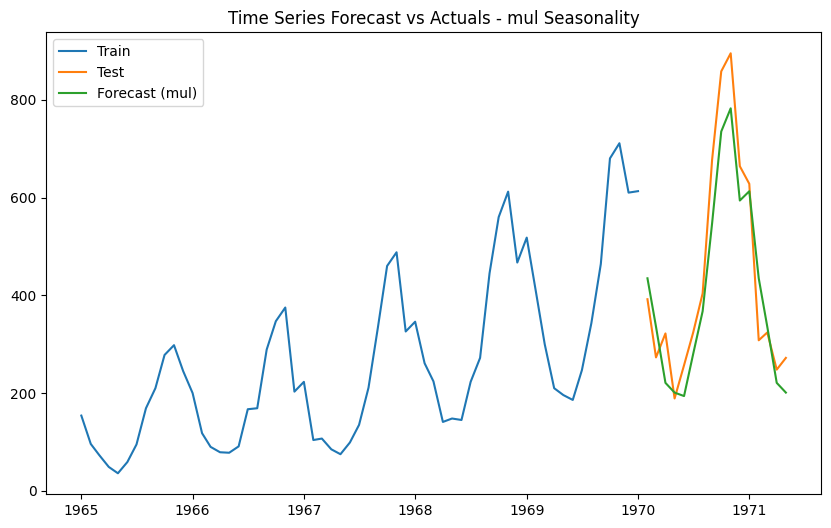

Seasonality Type: mul
MSE: 5952.423680431445
MAE: 65.6181699704196


In [3]:
# Анализ временного ряда о ежедневных рождениях
file_path_births = 'daily-total-female-births-in-cal.csv'
seasonal_periods_births = 30
seasonality_types = ['add', 'mul']
analyze_and_visualize_with_different_parameters(file_path_births, seasonal_periods_births, seasonality_types)

# Анализ временного ряда о месячных продажах
file_path_sales = 'monthly-sales-of-company-x-jan-6.csv'
seasonal_periods_sales = 12
analyze_and_visualize_with_different_parameters(file_path_sales, seasonal_periods_sales, seasonality_types)
